In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
data =pd.read_csv('https://raw.githubusercontent.com/kanishksh4rma/Tesla-stock-analysis-and-prediction/master/tesla_dataset.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [5]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2406,2020-01-21,530.250000,548.580017,528.409973,547.200012,547.200012,17803500
2407,2020-01-22,571.890015,594.500000,559.099976,569.559998,569.559998,31369000
2408,2020-01-23,564.250000,582.000000,555.599976,572.200012,572.200012,19651000
2409,2020-01-24,570.630005,573.859985,554.260010,564.820007,564.820007,14353600
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
data.shape

(2416, 7)

In [7]:
print("min.Date: ", data['Date'].min())
print("max.Date: ", data['Date'].max())

min.Date:  2010-06-29
max.Date:  2020-02-03


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

here we can notice that date is an object format. It will be in the date formate. later we chenge it.

In [9]:
data.isnull().sum()
data.isnull().sum().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


<AxesSubplot:>

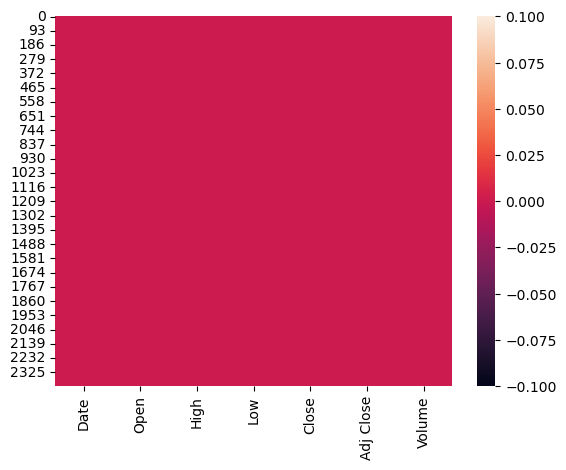

In [11]:
import seaborn as sns
sns.heatmap(data.isnull())

we notice that there is no null value is present in our dataset.

In [12]:
data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


# setting the Date as DataFrame index

In [13]:
data.set_index('Date', inplace = True)

the set_index() function is used to set the dataframeindex using existing columns. meke any column as index.
Index value should be unique.
Here collected the data as datewise. 
now we can fetch the data Datewise.

In [14]:
data.nunique().to_frame('No.of unique values')

,No.of unique values
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


check the value counts of each columns

In [15]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: Open, Length: 2132, dtype: int64


34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: High, Length: 2128, dtype: int64


27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: Low, Length: 2136, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: Close, Length: 2225, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.

we already notice that adjucent close and close have simliar values. It indiactes the duplicate data.
but we have confirmed that.
so now we can drop the adjucent close column.

In [16]:
data.drop(['Adj Close'], axis=1, inplace= True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [17]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [18]:
print('total duplictae rows are', data.duplicated().sum())

total duplictae rows are 0


In [19]:
data.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


here we can notice that
1. the meadian is greater then mean in open columns so it is a left skewnes in the column.
2. the meadian is greater then mean in High columns so it is a left skewnes in the column..
3. the meadian is greater then mean in Low columns so it is a left skewnes in the column..
4. the meadian is greater then mean in Close columns so it is a left skewnes in the column..
5. the meadian is greater then mean in Volume columns so it is a left skewnes in the column


we can also notice that standard deviation and min value, we founnd high difference in between this two.
also 75% and maximium there is huge difference maens thare is outliers is present in the data set

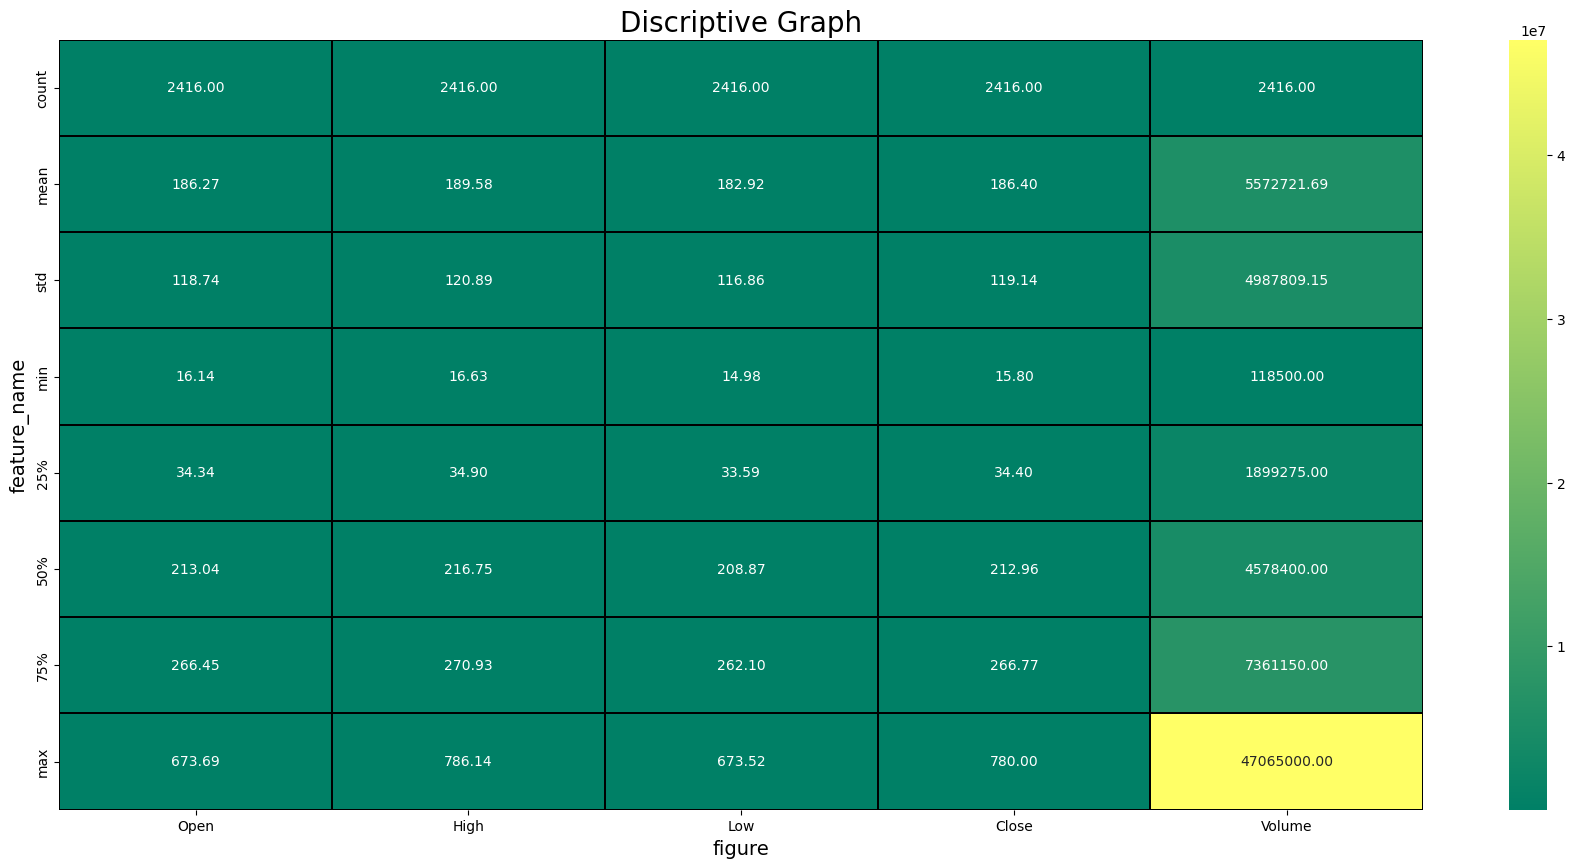

In [20]:
plt.figure(figsize=(22,10))
sns.heatmap(data.describe(), annot = True, fmt = '0.2f', linewidth = 0.2, linecolor= 'black', cmap = 'summer')
plt.xlabel('figure', fontsize = 14)
plt.ylabel('feature_name', fontsize = 14)
plt.title('Discriptive Graph', fontsize = 20)
plt.show()


we notice that the volume has outliers.

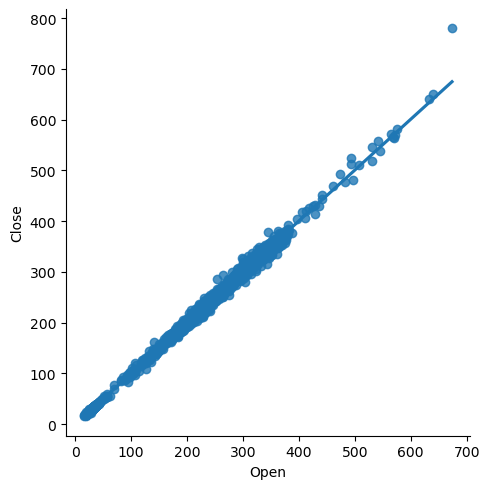

In [21]:
sns.lmplot(x='Open', y='Close', data = data, palette= "Spectral")

All the data is gathered in best fit line.
open has positive correaltion with close.

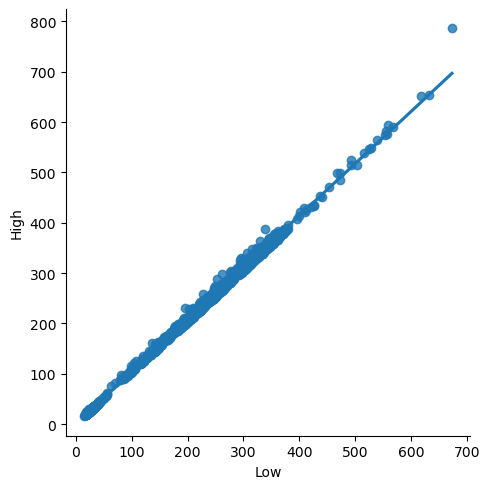

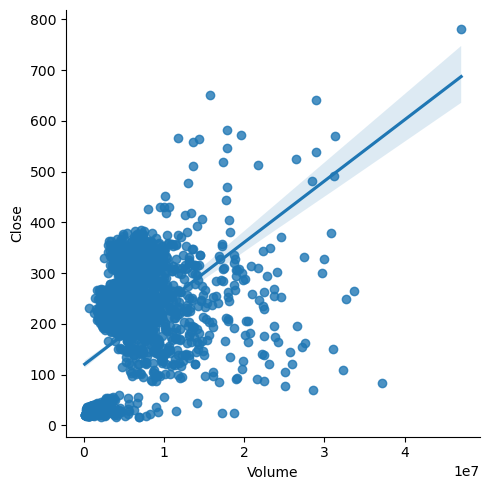

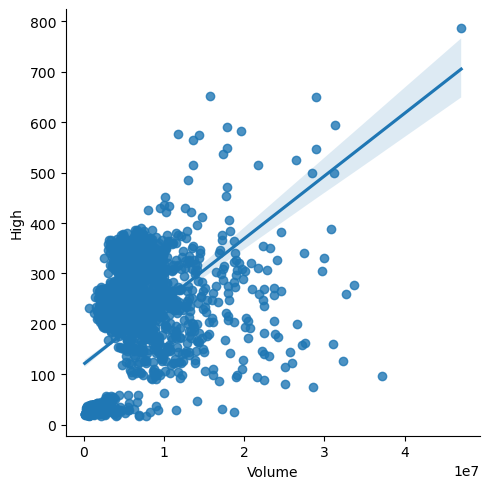

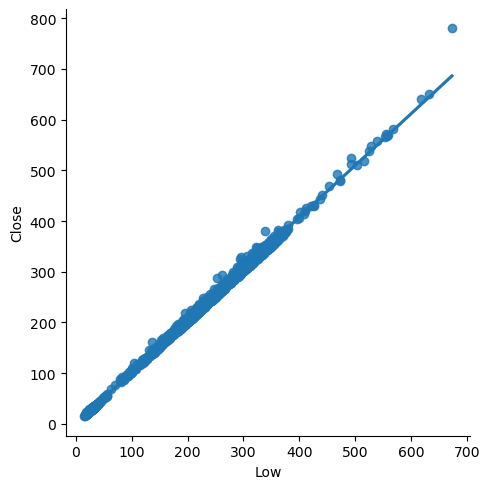

In [22]:
sns.lmplot(x='Low', y='High', data = data, palette= "Spectral")
sns.lmplot(x='Volume', y='Close', data = data, palette= "Spectral")
sns.lmplot(x='Volume', y='High', data = data, palette= "Spectral")
sns.lmplot(x='Low', y='Close', data = data, palette= "Spectral")

1. the low and high has positive co-relation.
2. the volume and close has less co-relation.
3. the volume and high has less co-relation.
4. the low and close has positive co-relation.


In [23]:
#lets plot regersson plot..it is a contineous data. 

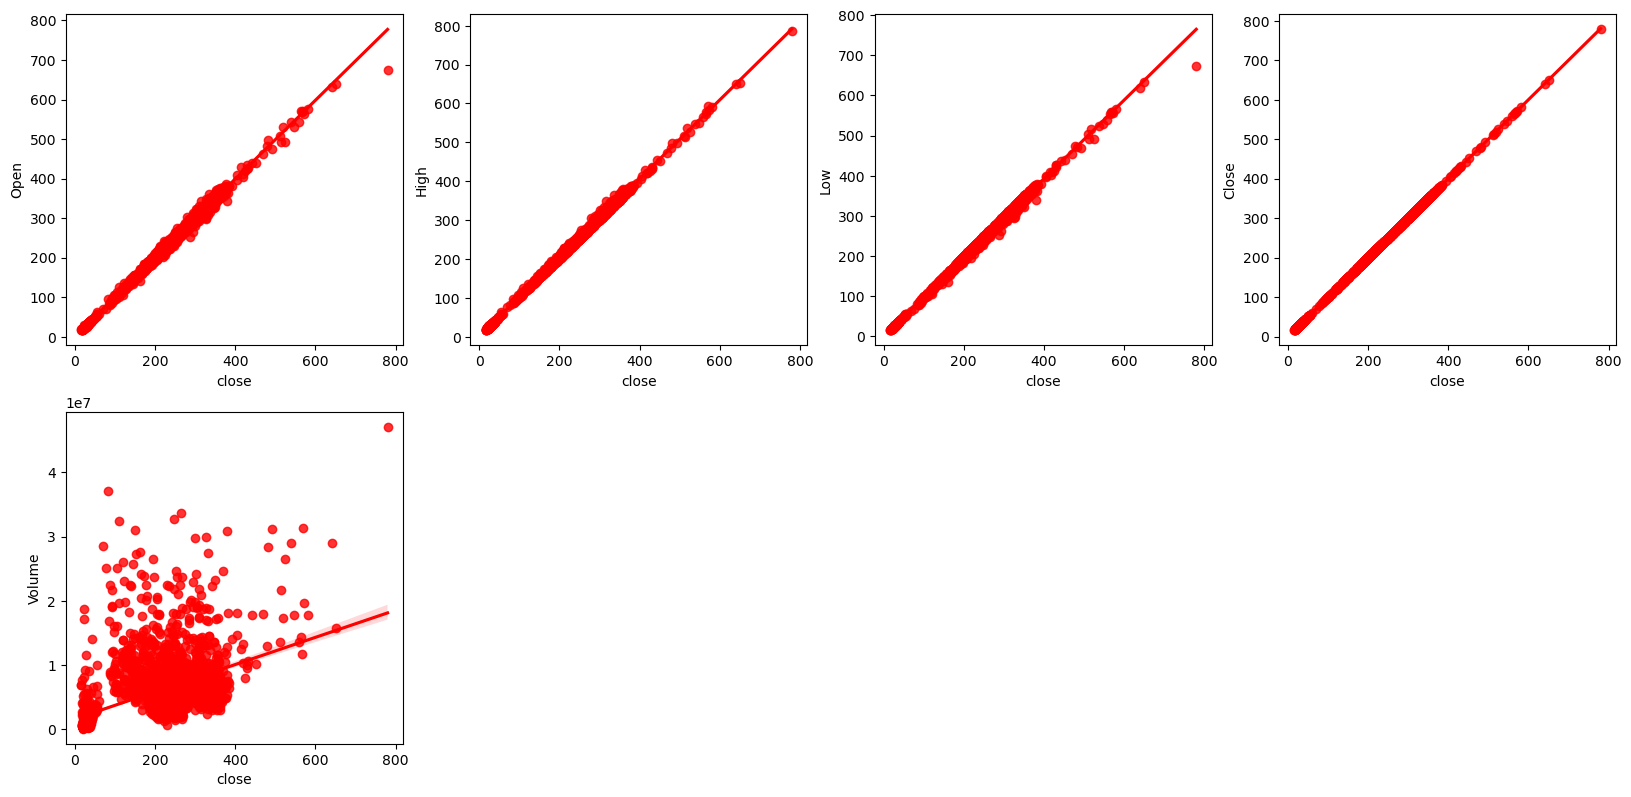

In [24]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x ="Close",y = i, data=data, color = 'r')
        plt.xlabel('close')
        plt.ylabel(i)
        
    p +=1
plt.show()    
    
    

here we can observe that open to close, high to close, low to close, and volume to close have positive corelation.

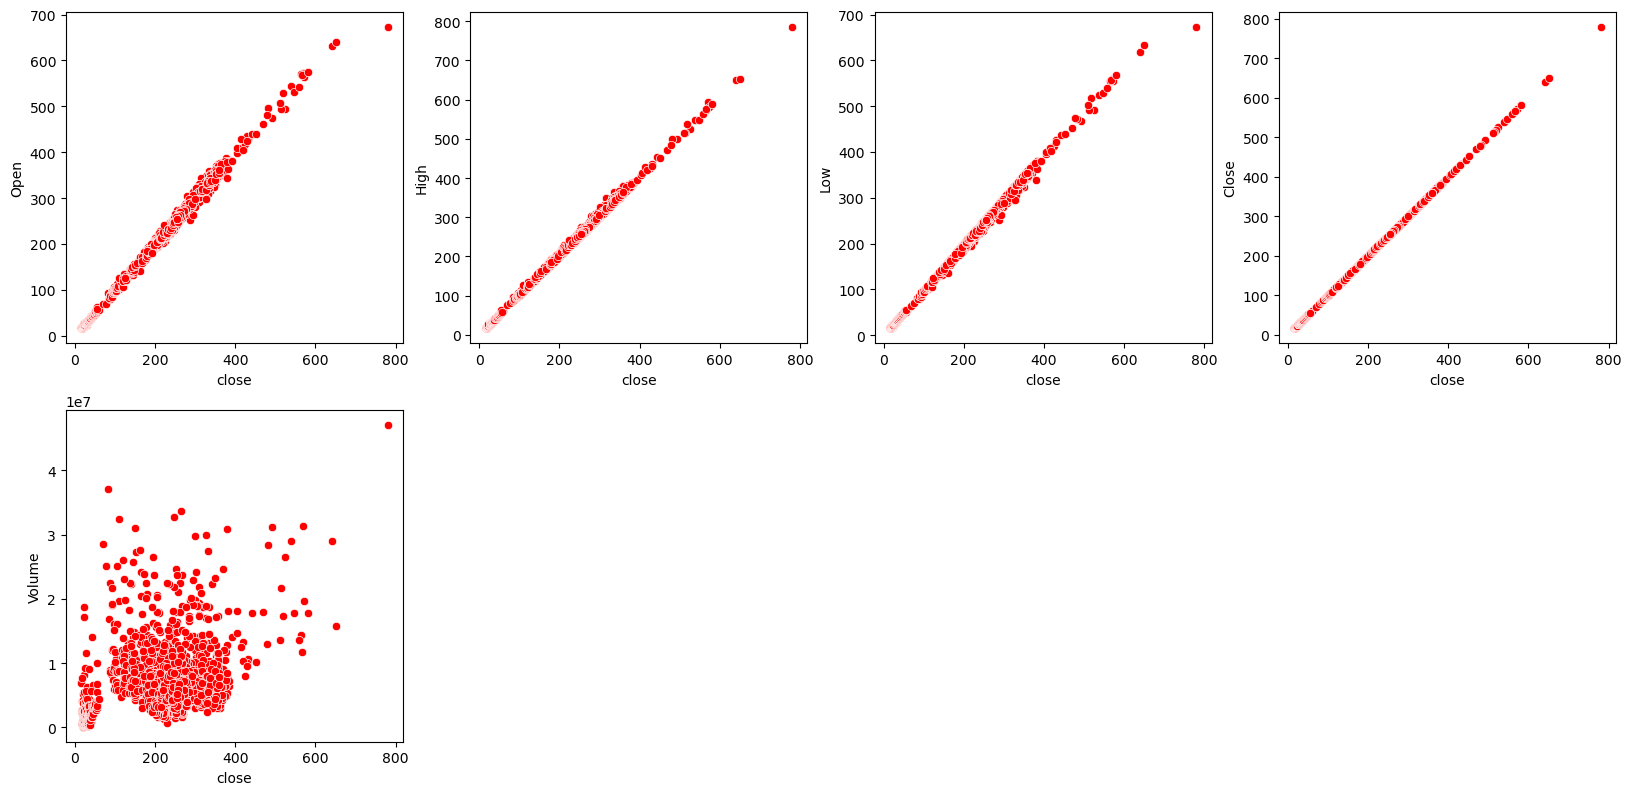

In [25]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=9:
        plt.subplot(5,4,p)
        sns.scatterplot(x ="Close",y = i, data=data, color = 'r')
        plt.xlabel('close')
        plt.ylabel(i)
        
    p +=1
plt.show() 

only volume to close scatter plot show high positive relationship with target variable.

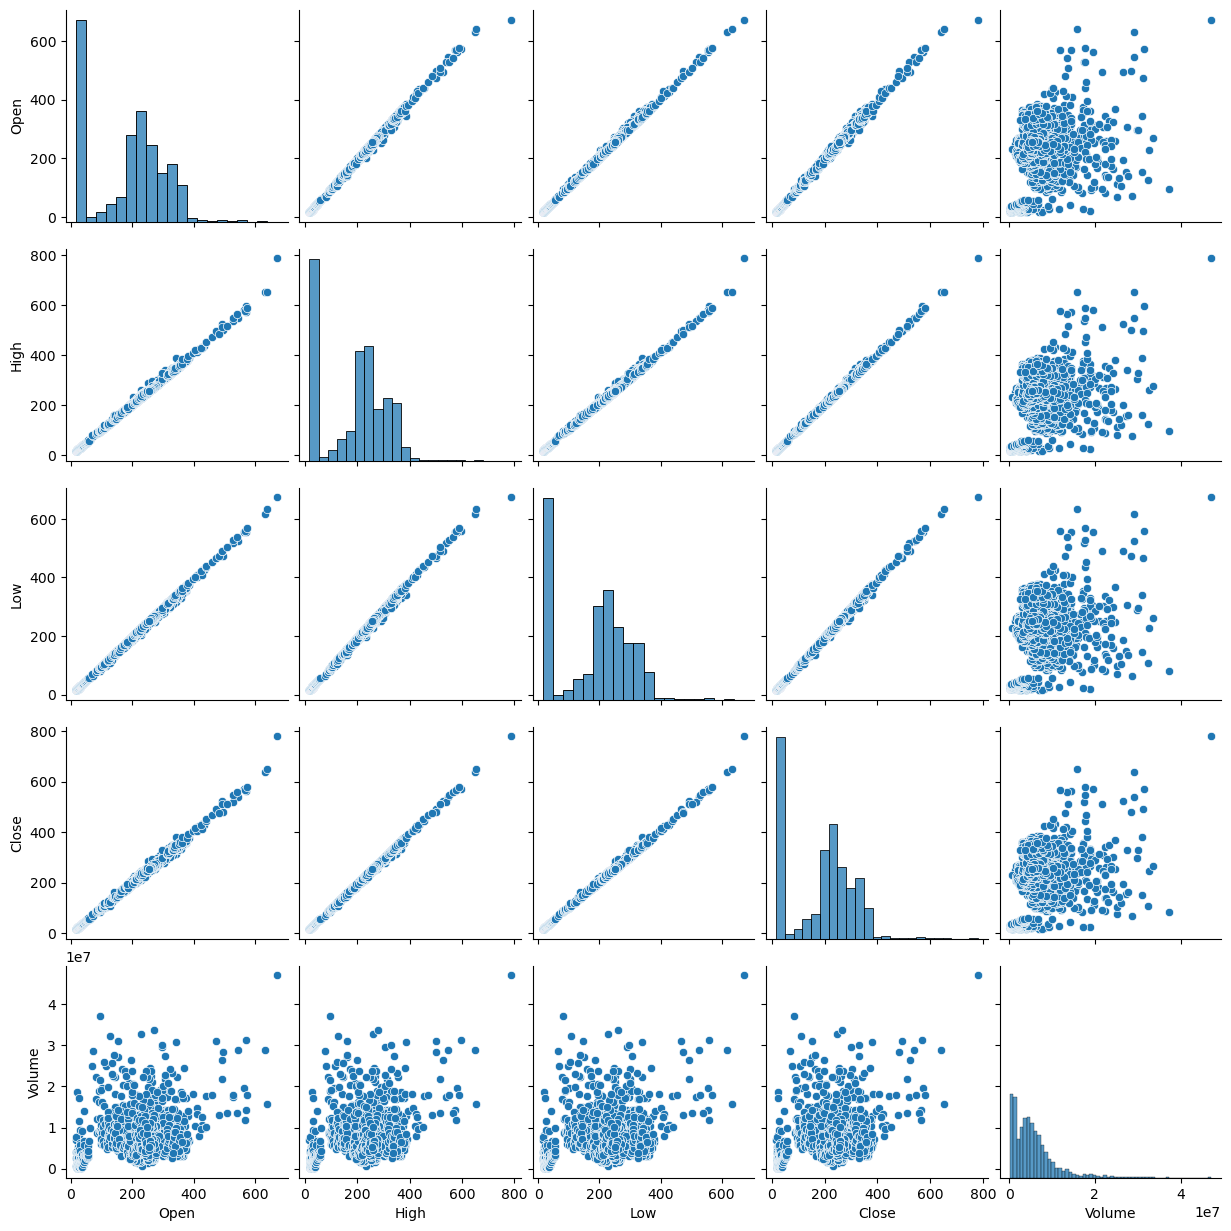

In [26]:
sns.pairplot(data=data, palette = 'Dark2')

we obsereve that all have positive corelation with the target variable.

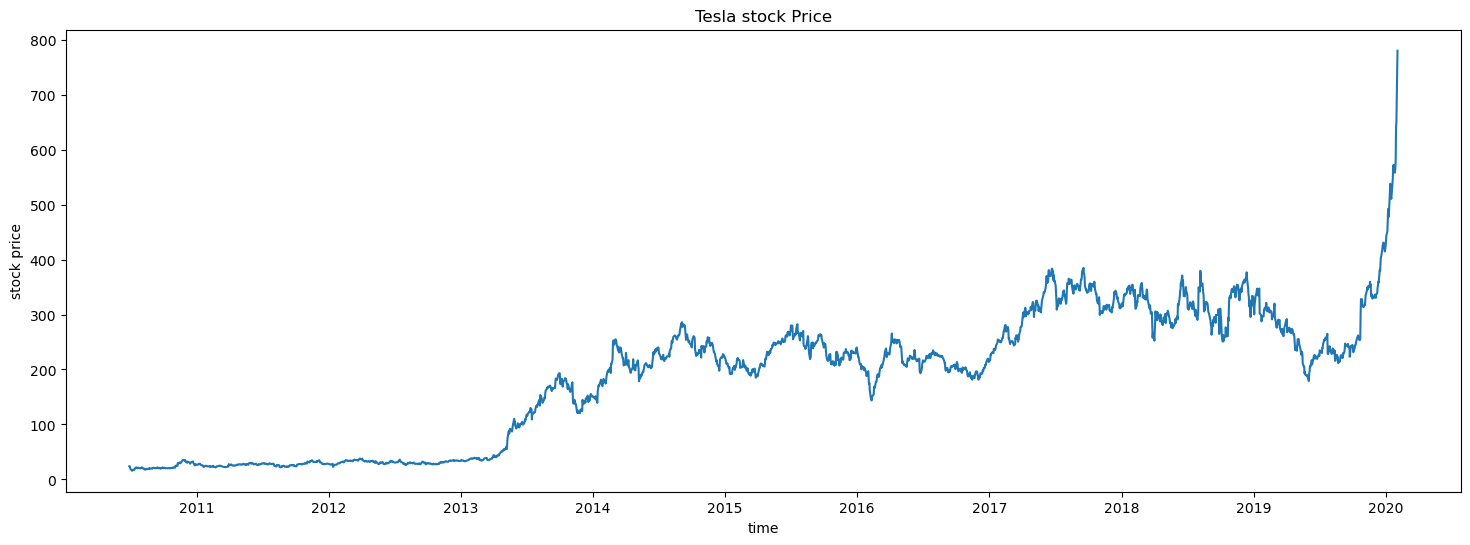

In [27]:
plt.figure(figsize = (18,6))
plt.plot(data.Close, label = 'closing price')
plt.ylabel('stock price')
plt.xlabel('time')
plt.title('Tesla stock Price')
plt.show()

here we notice that stock closing price getting higher w.r.t.time

Text(0.5, 1.0, 'The General Trends of all Values')

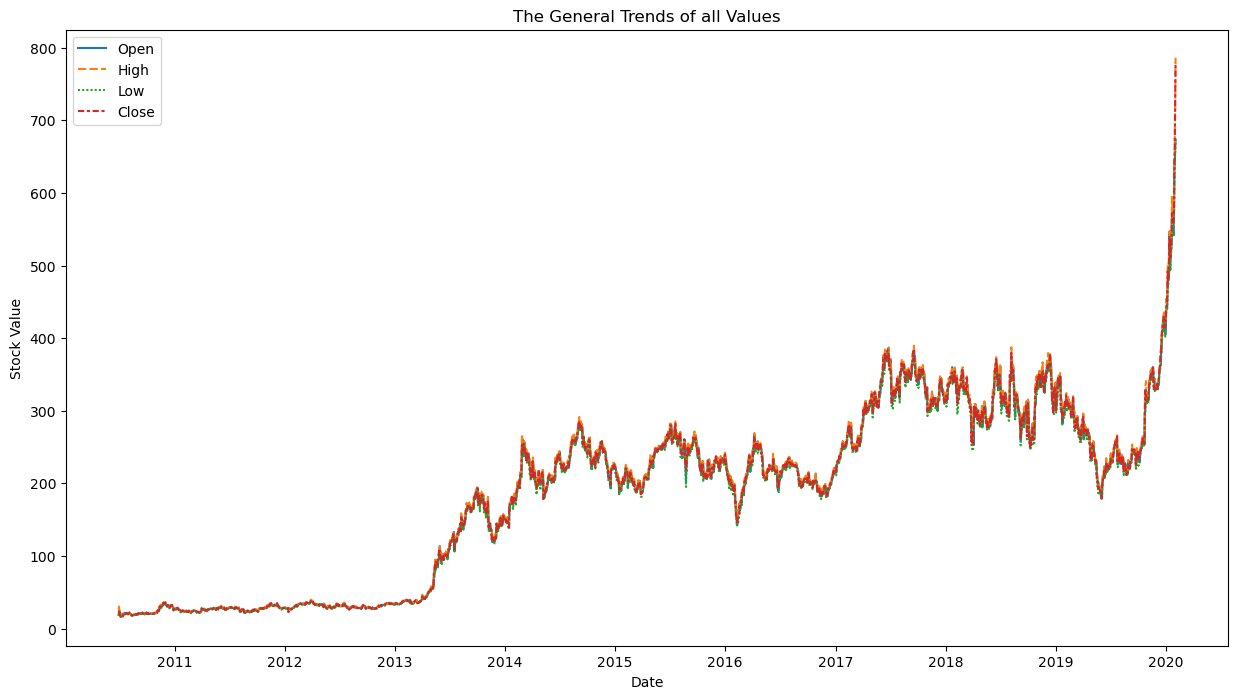

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data.iloc[:,:-1])
plt.ylabel('Stock Value')
plt.title('The General Trends of all Values')

In [29]:
# now lets check the outliers 

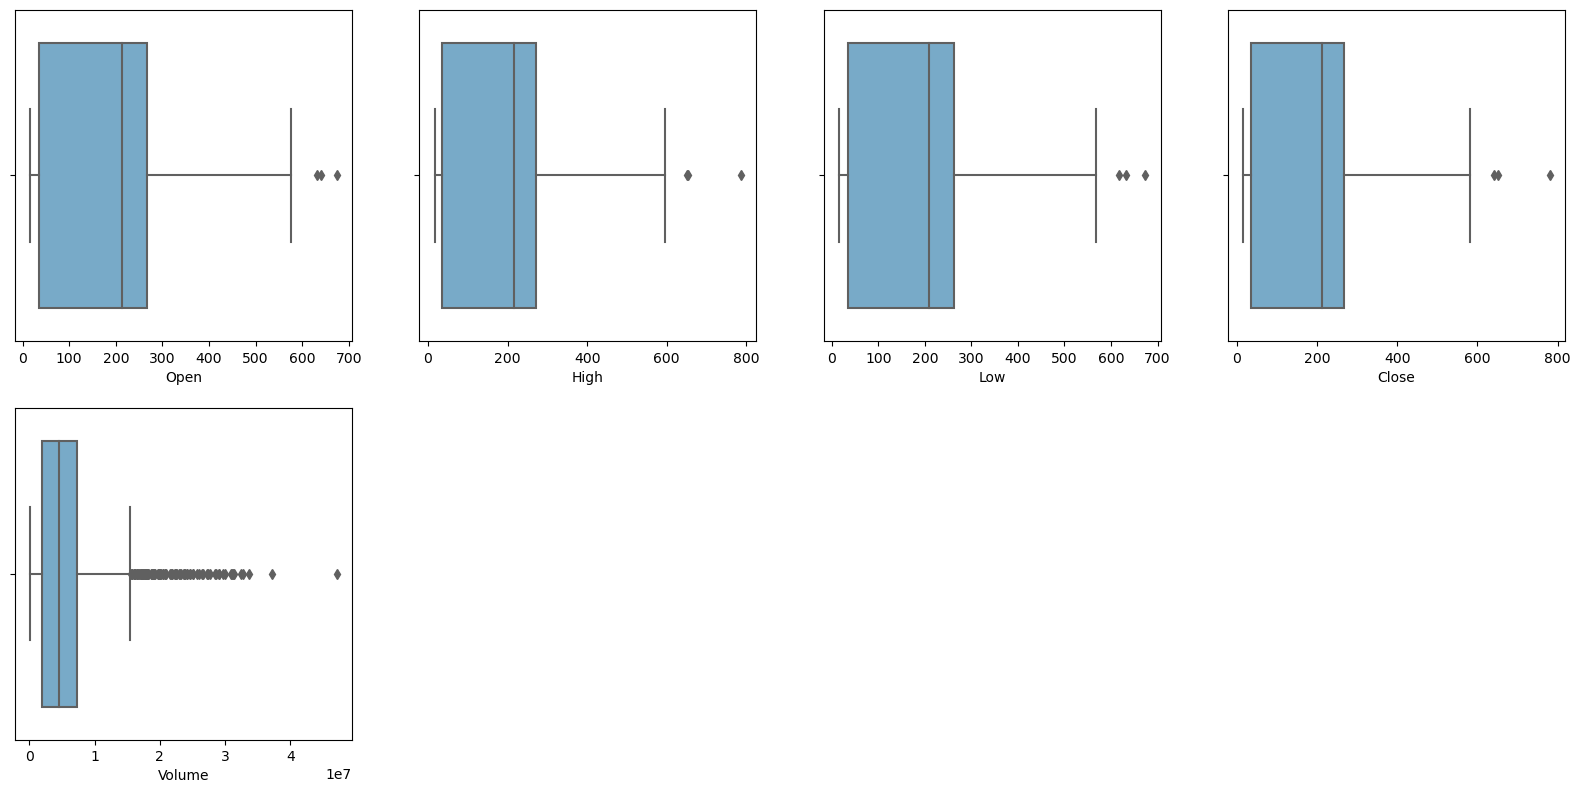

In [30]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=10:
        plt.subplot(5,4,p)
        sns.boxplot(data[i], palette = 'Blues', orient = 'h')
        plt.xlabel(i)
        
    p +=1
plt.show() 

In [ ]:
# lets remove the outliers

In [32]:
from scipy.stats import zscore
out_features = data[['Open', 'High', 'Low', 'Volume']]
z= np.abs(zscore(out_features))

 zscore thrshold value is -3 to 3 

In [33]:
np.where(z>3)

(array([ 720,  721,  722,  723,  725,  733,  766,  767,  783,  795,  821,
         822,  845,  846,  847,  848,  854,  864,  892,  920,  921, 1506,
        1950, 2002, 2038, 2041, 2042, 2063, 2078, 2079, 2097, 2098, 2154,
        2182, 2206, 2220, 2221, 2226, 2240, 2283, 2347, 2348, 2398, 2399,
        2401, 2402, 2402, 2404, 2407, 2407, 2407, 2407, 2408, 2408, 2408,
        2409, 2409, 2409, 2410, 2410, 2411, 2411, 2411, 2412, 2412, 2412,
        2413, 2413, 2413, 2413, 2414, 2414, 2414, 2415, 2415, 2415, 2415],
       dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3], dtype=int64))

In [34]:
z.iloc[795,3]

3.7295389503042795

In [35]:
df1= data[(z<3).all(axis= 1)]
df1.shape

(2360, 5)

In [36]:
print('Old DataFrame--', data.shape[0])
print('New DataFrame--', df1.shape[0])

Old DataFrame-- 2416
New DataFrame-- 2360


In [37]:
print('Data Loss percentage---', ((data.shape[0]-df1.shape[0])/data.shape[0]*100))

Data Loss percentage--- 2.3178807947019866


IQR method features only

In [38]:
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3-Q1
df2 = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [39]:
df2.shape

(2306, 5)

In [40]:
print('Data Loss percentage2---', ((data.shape[0]-df2.shape[0])/data.shape[0]*100))

Data Loss percentage2--- 4.5529801324503305


This data loss is acceptable.

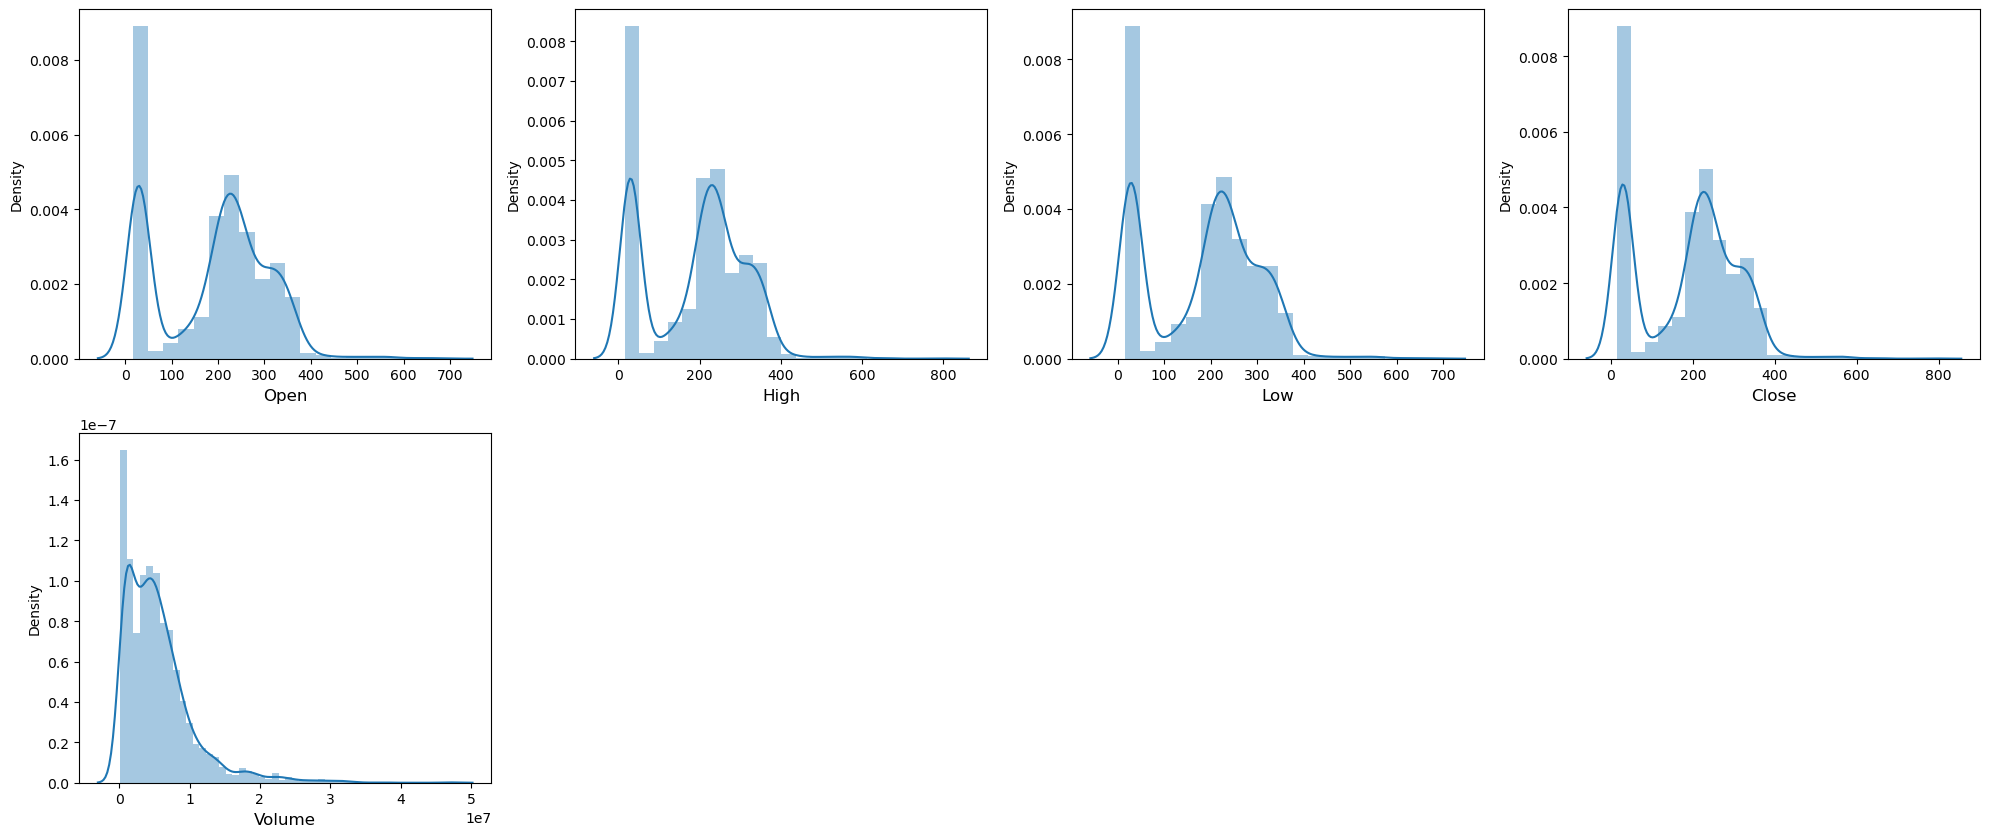

In [41]:
plt.figure(figsize= (20,25), facecolor = 'white')
plotnumber = 1
for col in data:
    if plotnumber<=20:
        ax= plt.subplot(6,4, plotnumber)
        sns.distplot([data[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout() 

In [42]:
data.skew()

Open     -0.014380
High      0.011923
Low      -0.010357
Close     0.016514
Volume    2.165242
dtype: float64

here only volume is above the accessible limit. limit range is -0.5 to 0.5

In [43]:
data["Volume"] = np.cbrt(data["Volume"])

In [44]:
data.skew()

Open     -0.014380
High      0.011923
Low      -0.010357
Close     0.016514
Volume    0.233977
dtype: float64

now it is fine

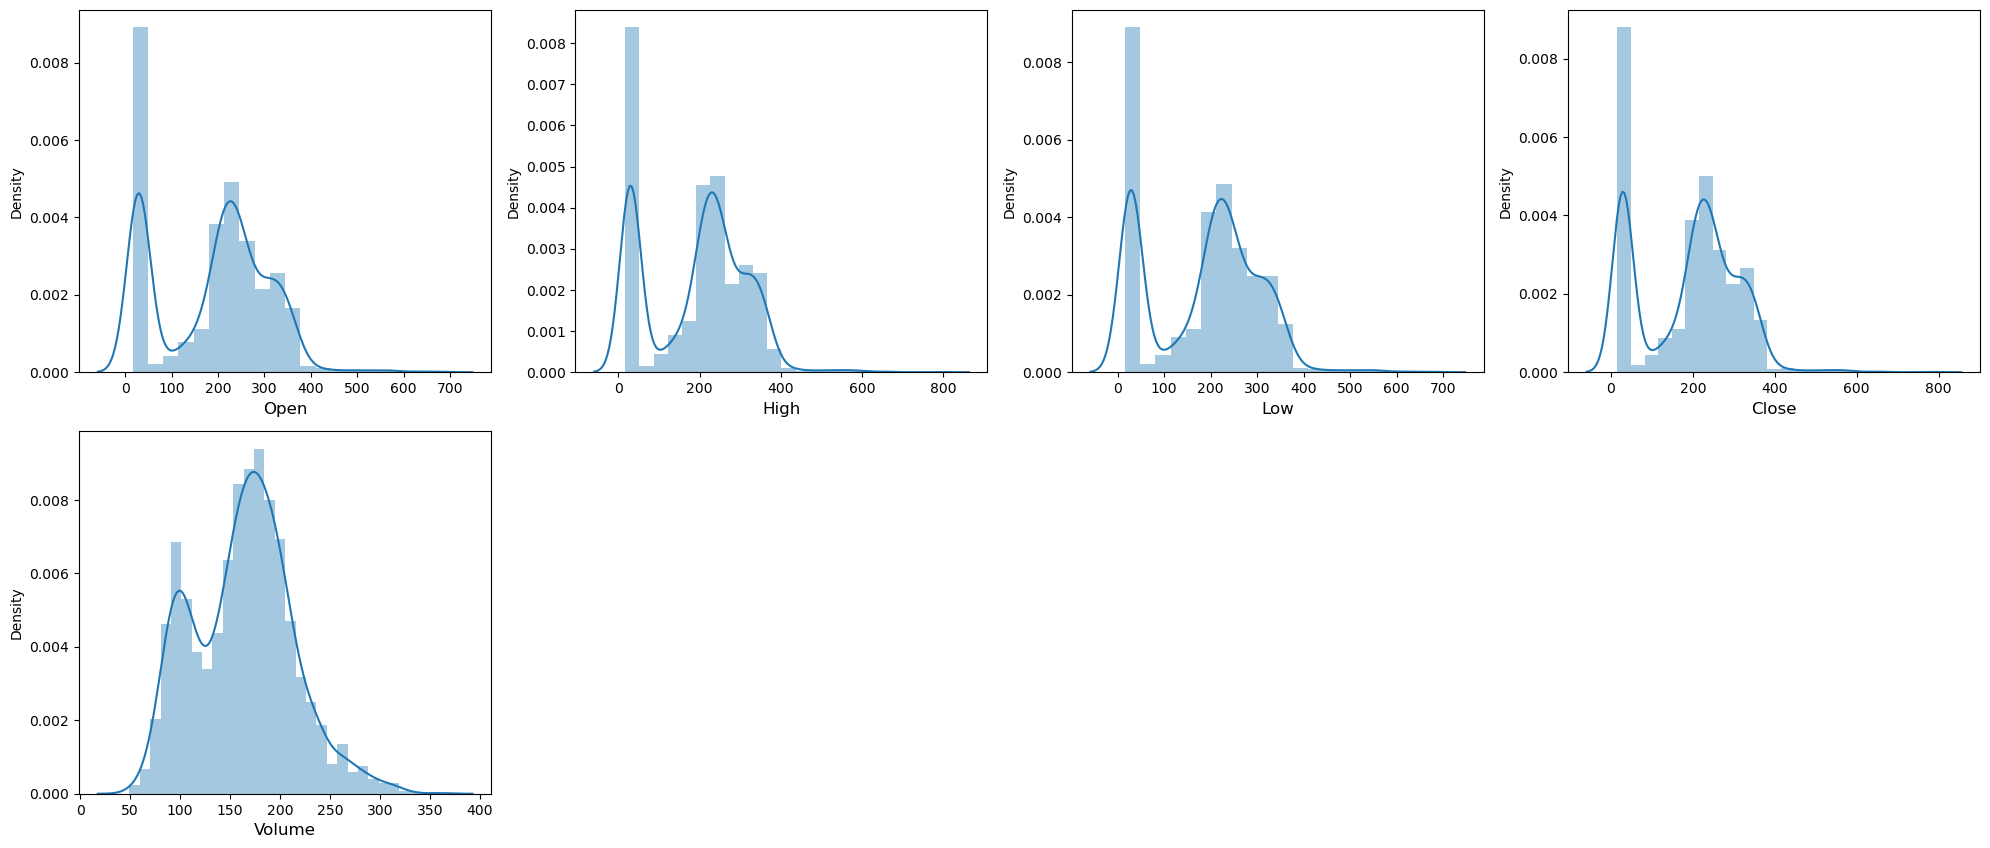

In [45]:
plt.figure(figsize= (20,25), facecolor = 'white')
plotnumber = 1
for col in data:
    if plotnumber<=20:
        ax= plt.subplot(6,4, plotnumber)
        sns.distplot([data[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()

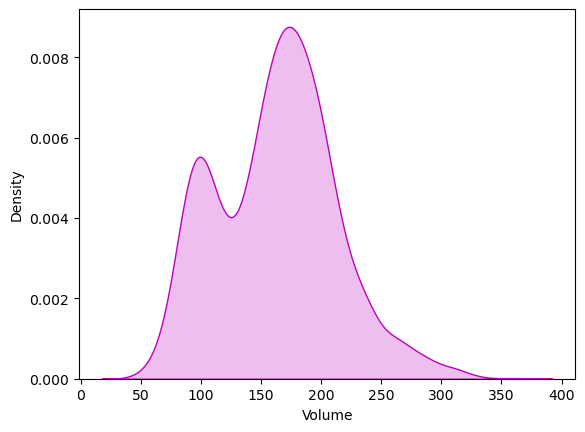

In [46]:
sns.distplot(data['Volume'], color = 'm', kde_kws = {'shade':True}, hist= False)
plt.show()

In [47]:
data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.666228
High,0.999425,1.000000,0.999389,0.999640,0.673443
Low,0.999575,0.999389,1.000000,0.999447,0.659228
Close,0.998886,0.999640,0.999447,1.000000,0.666938
Volume,0.666228,0.673443,0.659228,0.666938,1.000000


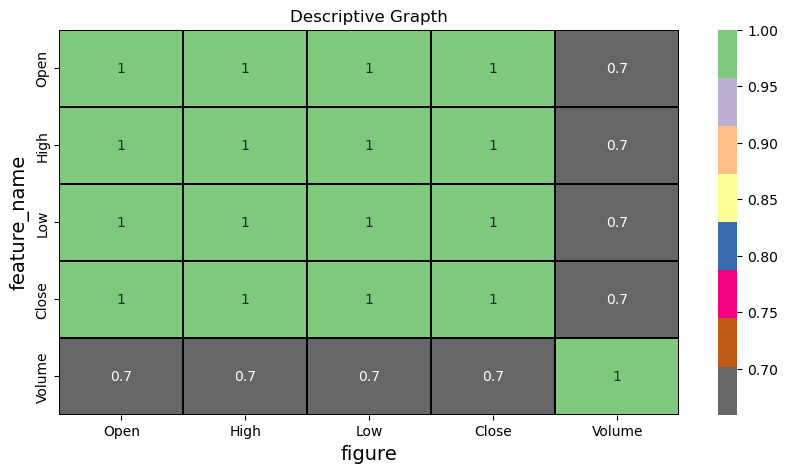

In [48]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), linewidths =0.1,fmt= '0.1g', linecolor = 'black',annot = True, cmap = 'Accent_r')
plt.xlabel('figure',fontsize = 14)
plt.ylabel('feature_name', fontsize= 14)
plt.title('Descriptive Grapth')
plt.show()

first we know the acceptable range -1 to 1 -------------> Highely negative corelation 0--------------------> no corelation -0.3 to 0.3 ---------> less corelation -0.5 to 0.5-----------> moderat -0.7 to 0.7-----------> very high colrelation

volume to high,close,low ad open have highely corelated

In [49]:
data.corr().Close.sort_values()

Volume    0.666938
Open      0.998886
Low       0.999447
High      0.999640
Close     1.000000
Name: Close, dtype: float64

Close is our label and target variable so co relation with our target variable is-----

In [50]:
# co-relation between label and feature using bar plot

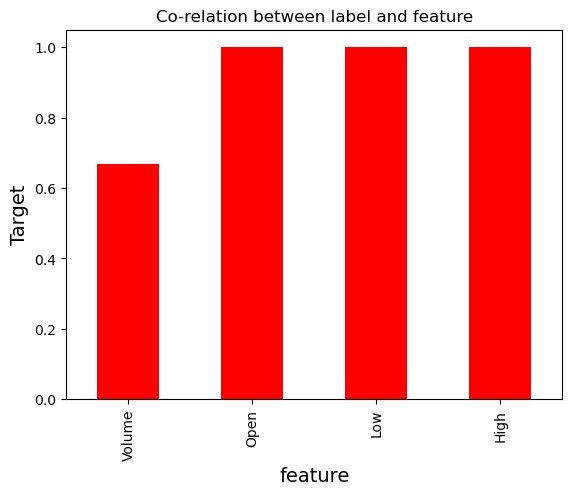

In [51]:
data.corr()['Close'].sort_values(ascending = True).drop(['Close']).plot(kind = "bar", color = 'r')
plt.xlabel('feature',fontsize = 14)
plt.ylabel('Target', fontsize= 14)
plt.title('Co-relation between label and feature')
plt.show()

here our target variable Close has less corelation with our feature Volume.

# seperating the independant and target varaible into X and Y

In [52]:
x = df1.drop("Close", axis =1)
y = df1["Close"]
print('feature dia = ', x.shape)
print('label dia = ', y.shape)

feature dia =  (2360, 4)
label dia =  (2360,)


In [53]:
 X= df1.drop("Close", axis =1)
Y  = df1["Close"]
print('feature dia = ', x.shape)
print('label dia = ', y.shape)

feature dia =  (2360, 4)
label dia =  (2360,)


In [54]:
# feature scaling using standard scalurization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Open,High,Low,Volume
0,-1.420294,-1.374432,-1.427526,3.473534
1,-1.361700,-1.328357,-1.377020,3.071844
2,-1.368517,-1.366611,-1.403588,0.790639
3,-1.385776,-1.390584,-1.417267,0.007455
4,-1.411664,-1.416937,-1.442520,0.446766
...,...,...,...,...
2355,2.397372,2.422375,2.393889,3.248626
2356,2.573326,2.535524,2.572237,1.996498
2357,2.987281,2.985228,2.950064,3.118062
2358,2.796138,2.796760,2.830552,2.166820


we have scaled the data by using StandardScaler to overcome the issue of biasness.

In [56]:
#To check multi co-linearity

SyntaxError: invalid syntax (891497856.py, line 1)

In [57]:
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif values,Features
0,1781.536724,Open
1,2425.594552,High
2,2154.245056,Low
3,2.262964,Volume


Already the data is limited and small so we cant delete or drop any data drom the dataset.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
MaxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = i)
    
LR = LinearRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc = r2_score(y_test,pred)

if acc>MaxAccu:
    MaxAccu = acc
    maxRS = i
    
print("Best r2 is", MaxAccu, "at random state", maxRS) 

Best r2 is 0.9997175360084782 at random state 399


In [ ]:
# creating train test split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = maxRS)

In [62]:
from sklearn.linear_model import Lasso,Ridge

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [70]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_LR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_LR))
print('mean square error:-', mean_squared_error(y_test, pred_LR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))


r2_score: 0.9997175360084782
r2_Score on training data: 99.97103996861489
mean absolute error:- 1.3691642598038494
mean square error:- 3.8388256407422765
root mean square error:- 1.9592921274639667




if our r2 is negative it means our model is not fitting well in our data. but our r2 is positive.

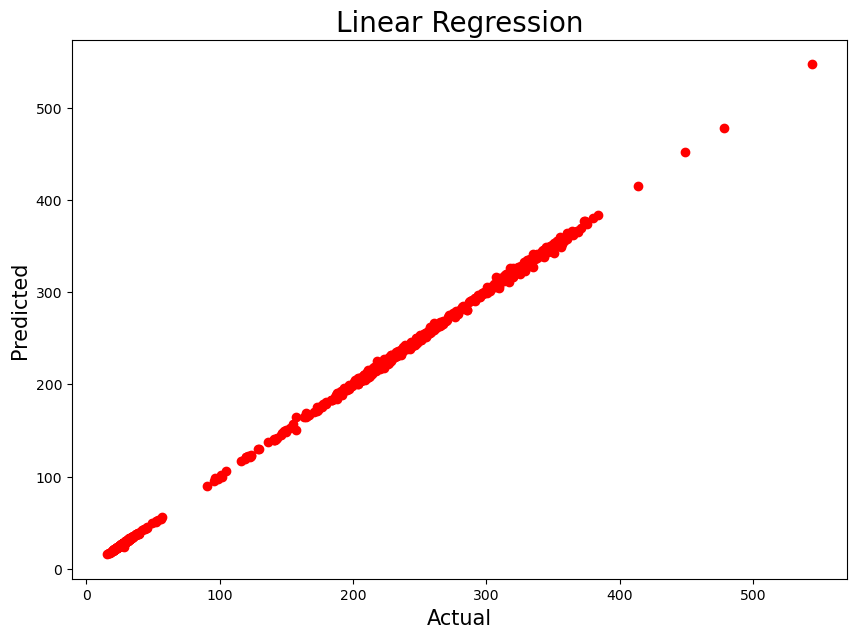

In [71]:
plt.figure(figsize=(10,7))
plt.scatter(x=pred_LR, y=y_test, color = 'r')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted',fontsize = 15)
plt.title('Linear Regression', fontsize = 20)
plt.show()

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR



In [91]:
print('Random Forest Regressor')
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_RFR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_RFR))
print('mean square error:-', mean_squared_error(y_test, pred_RFR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('\n','*'*100,'\n')

print('Extra Trees Regressor')
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_etr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_etr))
print('mean square error:-', mean_squared_error(y_test, pred_etr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_etr)))
print('\n','*'*100,'\n')

print('Decision Tree Regressor')
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_DTR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_DTR))
print('mean square error:-', mean_squared_error(y_test, pred_DTR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_DTR)))

Random Forest Regressor
r2_score: 0.9993236667022529
r2_Score on training data: 99.9911588262711
mean absolute error:- 1.7676243623163728
mean square error:- 9.191704723463726
root mean square error:- 3.0317824333984995

 **************************************************************************************************** 

Extra Trees Regressor
r2_score: 0.9994614690764224
r2_Score on training data: 100.0
mean absolute error:- 1.7061044399152425
mean square error:- 7.3189021603220255
root mean square error:- 2.705346957475515

 **************************************************************************************************** 

Decision Tree Regressor
r2_score: 0.9991016590798462
r2_Score on training data: 100.0
mean absolute error:- 2.155536738700565
mean square error:- 12.208898344299035
root mean square error:- 3.4941234014125824


In [92]:
print('Gradient Boosting Regressor')
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_gbr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_gbr))
print('mean square error:-', mean_squared_error(y_test, pred_gbr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_gbr)))
print('\n','*'*100,'\n')

print('Bagging Regressor')
br = BaggingRegressor()
br.fit(x_train,y_train)
pred_br = br.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_br))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_br))
print('mean square error:-', mean_squared_error(y_test, pred_br))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_br)))
print('\n','*'*100,'\n')
print('SVR')
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_svr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_svr))
print('mean square error:-', mean_squared_error(y_test, pred_svr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_svr)))

Gradient Boosting Regressor
r2_score: 0.999246214399359
r2_Score on training data: 100.0
mean absolute error:- 2.0528225182609106
mean square error:- 10.244319907019307
root mean square error:- 3.2006749142984368

 **************************************************************************************************** 

Bagging Regressor
r2_score: 0.9992321991869946
r2_Score on training data: 100.0
mean absolute error:- 1.88471918022599
mean square error:- 10.434793589329011
root mean square error:- 3.2302931119836495

 **************************************************************************************************** 

SVR
r2_score: 0.9582639255620773
r2_Score on training data: 96.30147304204972
mean absolute error:- 9.204062157302744
mean square error:- 567.2139370156117
root mean square error:- 23.816253630989316


In [93]:
from sklearn.neighbors import KNeighborsRegressor
print('KNeighbors Regressor')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('r2_score:', r2_score(y_test, pred_knn))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_knn))
print('mean square error:-', mean_squared_error(y_test, pred_knn))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))
print('\n','*'*100,'\n')

KNeighbors Regressor
r2_score: 0.9975177167767015
r2_Score on training data: 99.87035798557334
mean absolute error:- 3.1267288949152543
mean square error:- 33.73545928400902
root mean square error:- 5.808223418912966

 **************************************************************************************************** 



In [95]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_LR)-score.mean())*100)

[0.99305198 0.99966177 0.99368894 0.99880914 0.99686762]
0.9964158896834654
difference between r2score and cross validation score is--- 0.33016463250128414


In [97]:
print("random forest cv ")
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_RFR)-score.mean())*100)
print('\n','*'*100,'\n')

print("extra tree reg cv ")
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_etr)-score.mean())*100)
print('\n','*'*100,'\n')

print("Decision tree regressor cv ")
score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_DTR)-score.mean())*100)
print('\n','*'*100,'\n')

print("Gradient Boost cv ")
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_gbr)-score.mean())*100)
print('\n','*'*100,'\n')

print("BR cv ")
score = cross_val_score(br,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_br)-score.mean())*100)
print('\n','*'*100,'\n')

print(" SVR cv ")
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_svr)-score.mean())*100)
print('\n','*'*100,'\n')

print("KNN cv ")
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_knn)-score.mean())*100)
print('\n','*'*100,'\n')

random forest cv 
[0.59159588 0.96883874 0.98950498 0.99745112 0.91934869]
0.8933478818112102
difference between r2score and cross validation score is--- 10.597578489104276

 **************************************************************************************************** 

extra tree reg cv 
[0.62522341 0.9988707  0.99114213 0.99779217 0.91940188]
0.906486057947631
difference between r2score and cross validation score is--- 9.297541112879138

 **************************************************************************************************** 

Decision tree regressor cv 
[0.62871602 0.96524812 0.98053111 0.99519846 0.918922  ]
0.8977231409073207
difference between r2score and cross validation score is--- 10.13785181725254

 **************************************************************************************************** 

Gradient Boost cv 
[0.42441929 0.97250582 0.98826012 0.99646571 0.91766239]
0.8598626651250753
difference between r2score and cross validation score is--- 13.




we clearly observe that Linear regressor have less difference in R2 score.
so it wii be our model.

In [99]:
from sklearn.model_selection import GridSearchCV

In [104]:
param = {'alpha': [1.0,0.5,0.4,2],
        'fit_intercept':[True, False],
        'positive':[False, True],
        'random_state':[1,4,10,20],
        'solver':['auto','svd','cholesky', 'isqr','sag','saga','lbfgs']
        }
gscv =GridSearchCV(Ridge(),param, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr', 'sag',
                                    'saga', 'lbfgs']})

In [105]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [108]:
model =Ridge(alpha= 0.4, fit_intercept= True, 
             positive= False,
             random_state= 1,
             solver= 'auto')

In [110]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('r2_score:', r2_score(y_test, pred))

print('mean absolute error:-', mean_absolute_error(y_test, pred))
print('mean square error:-', mean_squared_error(y_test, pred))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred)))
print('\n','*'*100,'\n')

r2_score: 0.999611430686562
mean absolute error:- 1.6040188593107565
mean square error:- 5.2808495539384355
root mean square error:- 2.2980099116275445

 **************************************************************************************************** 



In [112]:
import pickle
file_name = 'Tesla_Stock.pkl'
pickle.dump(model,open(file_name,'wb'))

In [114]:
loaded_model = pickle.load(open('Tesla_stock.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.9611430686562


In [117]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index = ["prdicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
prdicted,28.500860,187.095647,29.641794,352.864633,210.507000,28.102226,308.603900,151.416456,239.808421,202.259323,...,49.212686,211.547760,211.660941,208.827275,172.521475,27.148767,359.174928,255.871699,34.078517,371.660249
original,28.549999,184.520004,29.410000,355.489990,208.449997,27.540001,310.220001,152.460007,239.490005,204.029999,...,50.189999,208.960007,210.350006,210.240005,171.539993,26.910000,352.619995,254.339996,34.279999,377.640015
